#### sklearn.linear_model.Ridge
class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [1]:
from sklearn.linear_model import Ridge
import pandas as pd

In [3]:
house_df = pd.read_csv('datasets/housing.csv', header = None, names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],sep = '\s+')
house_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


In [4]:
from sklearn.model_selection import train_test_split
features = house_df.drop('MEDV' ,axis=1) 
label = house_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 42)

In [5]:
# data scaling
from sklearn.preprocessing import RobustScaler ,StandardScaler , MinMaxScaler
scaler = RobustScaler()
scaler.fit(X_train)
scaled_X_train  = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test) 

In [15]:
# modeling
from sklearn.linear_model import Ridge, LinearRegression
rg_regressor = Ridge(alpha = 0)
rg_regressor.fit(scaled_X_train, y_train)

Ridge(alpha=0)

In [16]:
rg_regressor.coef_

array([-0.35290689,  0.60220928,  0.52373794,  2.7844382 , -3.07927138,
        3.31248077, -0.30285502, -4.79666938,  2.09943788, -4.12030629,
       -3.11255122,  0.25051595, -4.88228567])

In [12]:
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)

LinearRegression()

In [10]:
lr.coef_

array([-0.35290689,  0.60220928,  0.52373794,  2.7844382 , -3.07927138,
        3.31248077, -0.30285502, -4.79666938,  2.09943788, -4.12030629,
       -3.11255122,  0.25051595, -4.88228567])

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    ridge = Ridge(alpha = alpha)

    neg_mse_scores = cross_val_score(ridge, features, label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'. format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.788
alpha 1 일 때 5 folds의 평균 RMSE: 5.653
alpha 10 일 때 5 folds의 평균 RMSE: 5.518
alpha 100 일 때 5 folds의 평균 RMSE: 5.330


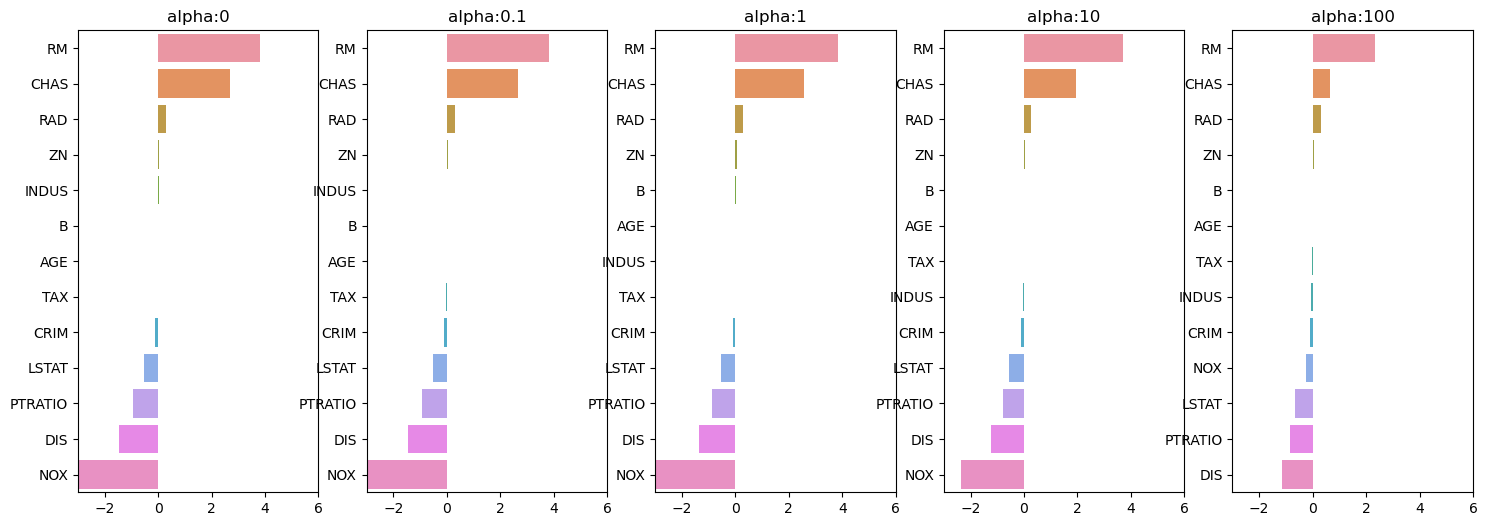

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols =5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(features, label)

    coeff = pd.Series(data = ridge.coef_, index = features.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#### sklearn.linear_model.Lasso
class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [19]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    lasso = Lasso(alpha = alpha)

    neg_mse_scores = cross_val_score(lasso, features, label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'. format(alpha, avg_rmse))

c:\Users\Master\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Master\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Master\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+03, tolerance: 3.919e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model

alpha 0 일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.615
alpha 1 일 때 5 folds의 평균 RMSE: 5.776
alpha 10 일 때 5 folds의 평균 RMSE: 6.586
alpha 100 일 때 5 folds의 평균 RMSE: 8.393


C:\Users\Master\AppData\Local\Temp\ipykernel_20912\3450688040.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(features, label)
c:\Users\Master\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Master\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.539e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


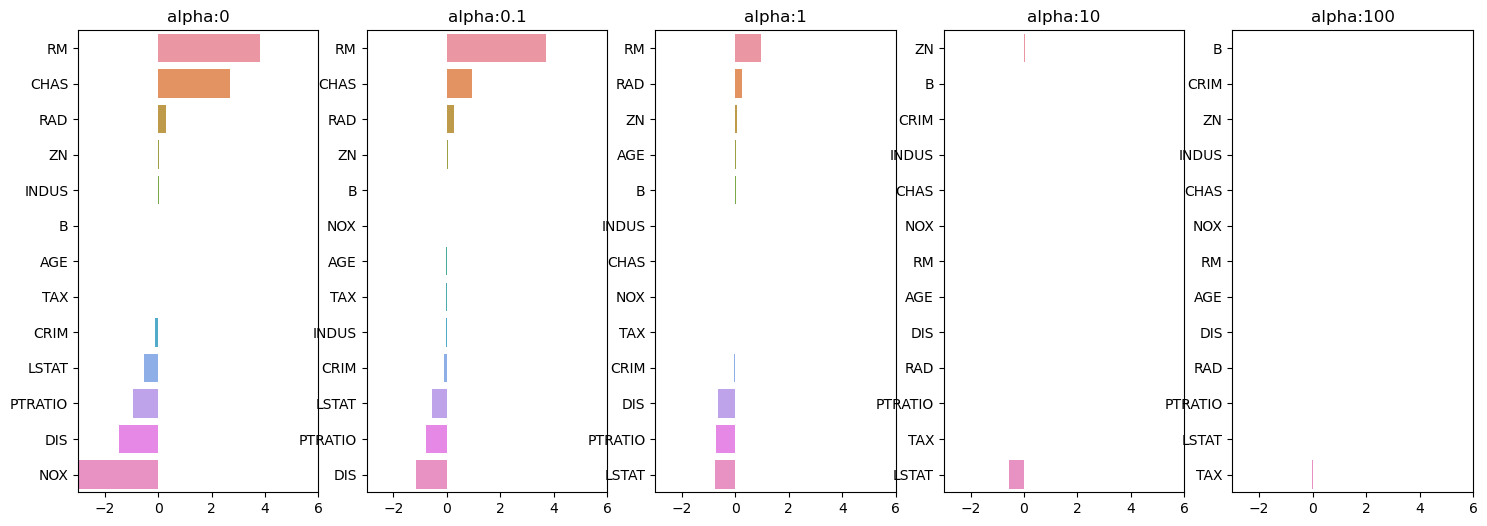

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols =5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(features, label)

    coeff = pd.Series(data = lasso.coef_, index = features.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

#### sklearn.linear_model.ElasticNet
class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [23]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

alphas = [0, 0.1, 1, 10, 100]
for alpha in alphas:
    elastic = ElasticNet(alpha = alpha, l1_ratio = 0.6)

    neg_mse_scores = cross_val_score(elastic, features, label, scoring = 'neg_mean_squared_error', cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'. format(alpha, avg_rmse))

c:\Users\Master\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Master\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Master\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+03, tolerance: 3.919e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model

alpha 0 일 때 5 folds의 평균 RMSE: 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE: 5.501
alpha 1 일 때 5 folds의 평균 RMSE: 5.555
alpha 10 일 때 5 folds의 평균 RMSE: 6.490
alpha 100 일 때 5 folds의 평균 RMSE: 8.330


C:\Users\Master\AppData\Local\Temp\ipykernel_20912\569485925.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  elastic.fit(features, label)
c:\Users\Master\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Master\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.539e+03, tolerance: 4.272e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


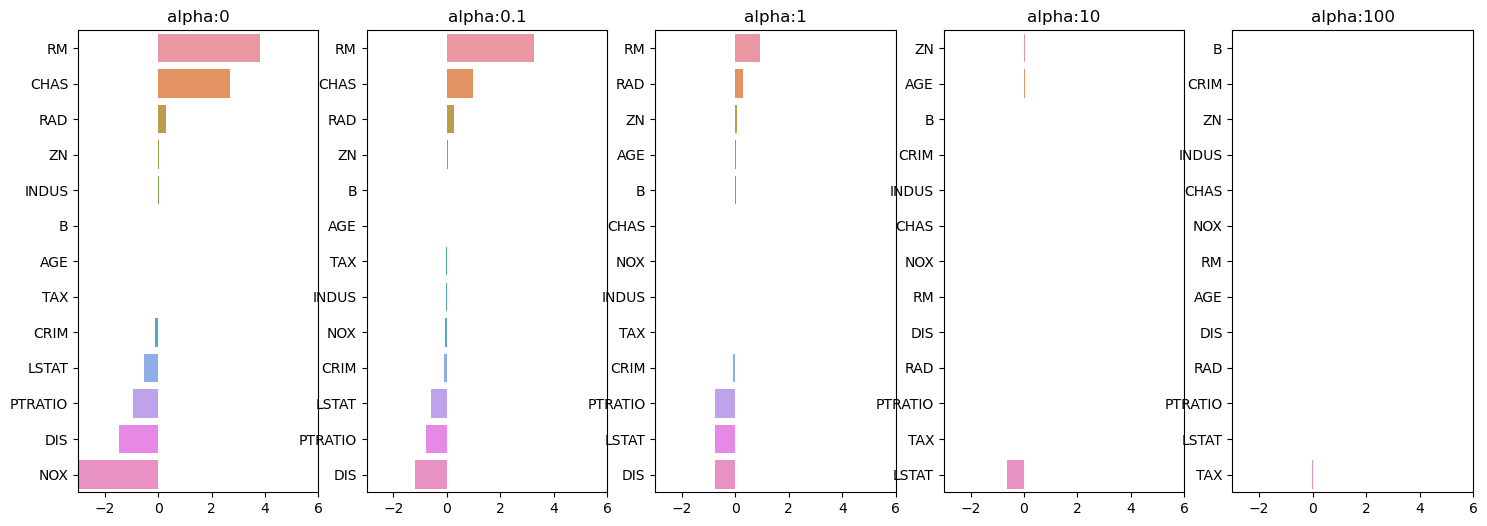

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize = (18, 6), nrows = 1, ncols =5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    elastic = ElasticNet(alpha = alpha)
    elastic.fit(features, label)

    coeff = pd.Series(data = elastic.coef_, index = features.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()